In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
df_train = pd.read_csv('./input/train_origin.csv');df_train.name='df_train';
df_smote = pd.read_csv('./input/train_smote.csv');df_smote.name='df_smote';
df_lhb = pd.read_csv('./input/train_lhb.csv');df_lhb.name='df_lhb';
df_valid = pd.read_csv('./input/valid.csv');df_valid.name='df_valid';
df_test = pd.read_csv('./input/test.csv');df_test.name='df_test';


In [19]:
len(df_train), len(df_smote), len(df_lhb), len(df_valid), len(df_test)

(182276, 363942, 333502, 45569, 56962)

In [22]:
df_list = [df_train, df_smote, df_lhb, df_valid, df_test]
for df in df_list:
    ll_split = np.arange(1,len(df),len(df)//10);num_bef = 0
    print('*'*100)
    print('{}'.format(df.name))
    for i, num in enumerate(ll_split):
        if i != 0:
            print('[{:6d}]Class1:{:10d}, Class0:{:10d}, rate{:10.6f}'.format(
                    num, 
                    sum(df[num_bef:num]["Class"] == 1),
                    sum(df[num_bef:num]["Class"] == 0),
                    #sum(df[num_bef:num]["Class"] == 1)/sum(df[num_bef:num]["Class"] == 0)*100
                    0))
            num_bef = num

****************************************************************************************************
df_train
[ 18228]Class1:        32, Class0:     18196, rate  0.000000
[ 36455]Class1:        27, Class0:     18200, rate  0.000000
[ 54682]Class1:        28, Class0:     18199, rate  0.000000
[ 72909]Class1:        41, Class0:     18186, rate  0.000000
[ 91136]Class1:        27, Class0:     18200, rate  0.000000
[109363]Class1:        29, Class0:     18198, rate  0.000000
[127590]Class1:        34, Class0:     18193, rate  0.000000
[145817]Class1:        22, Class0:     18205, rate  0.000000
[164044]Class1:        39, Class0:     18188, rate  0.000000
[182271]Class1:        26, Class0:     18201, rate  0.000000
****************************************************************************************************
df_smote
[ 36395]Class1:     18195, Class0:     18200, rate  0.000000
[ 72789]Class1:     18152, Class0:     18242, rate  0.000000
[109183]Class1:     18259, Class0:     18135, ra

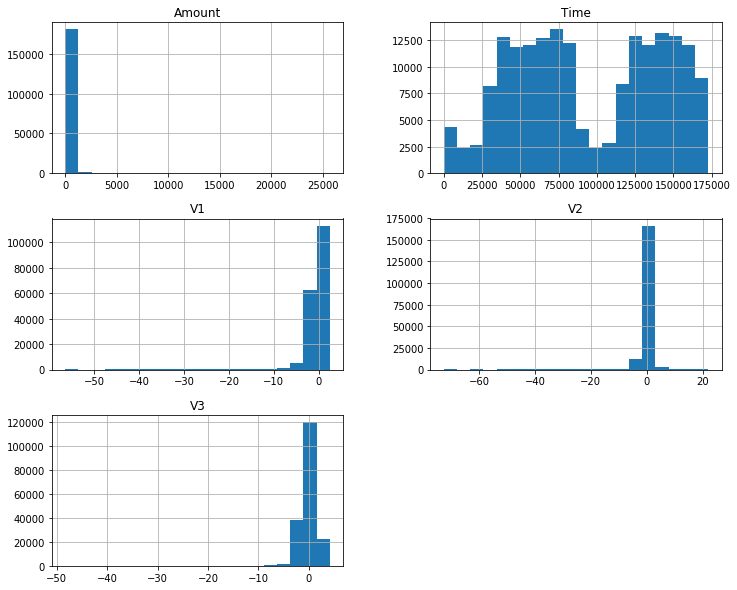

In [6]:
df_train[["Time","Amount","V1","V2","V3"]].hist(bins=20, figsize=(12,10))
plt.show()

In [123]:
bins = np.arange(0,172800, 3600)

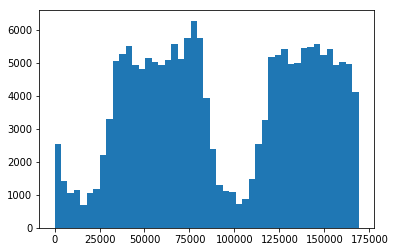

In [124]:
plt.hist(df_train["Time"], bins=bins)
plt.show()

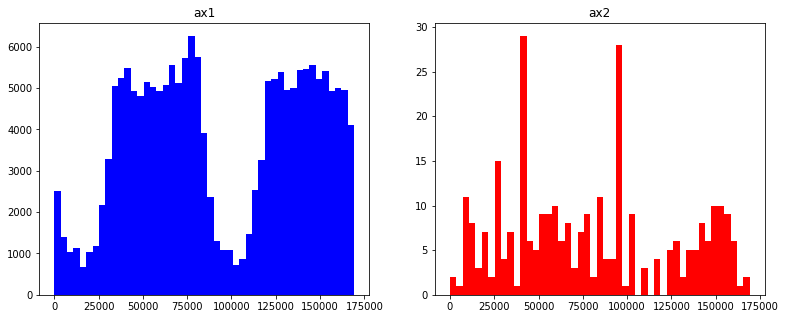

In [128]:
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1,2,1);ax1.set_title('ax1')
plt.hist(df_train[df_train["Class"]==0]["Time"], bins = bins, color='b')
ax2 = fig.add_subplot(1,2,2);ax2.set_title('ax2')
plt.hist(df_train[df_train["Class"]==1]["Time"], bins = bins, color='r')

plt.show()

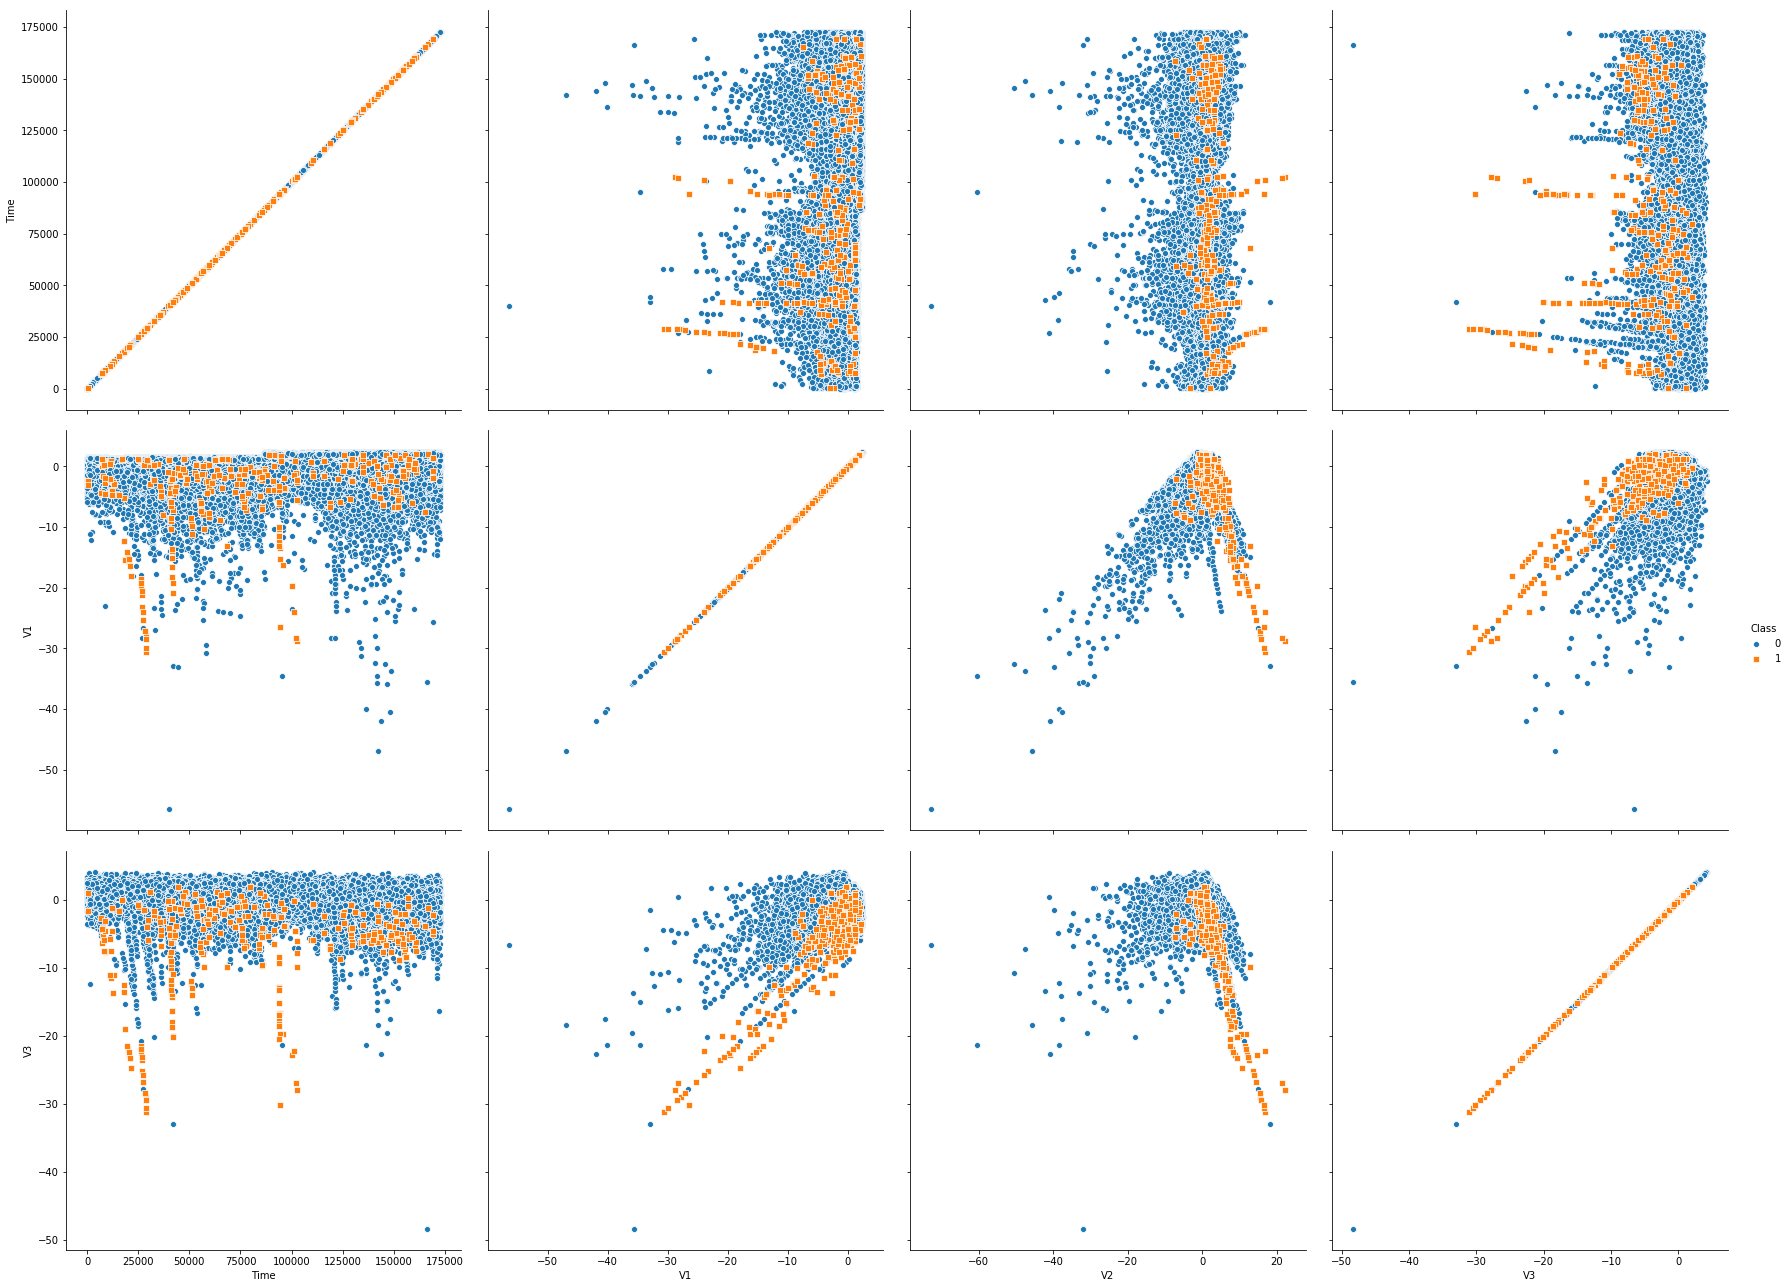

In [73]:
sns.pairplot(df_train, 
             x_vars=["Time","V1","V2","V3"], 
             y_vars=["Time","V1","V3"], hue="Class", diag_kind='hist', size=6, markers=["o","s"])
plt.show()

In [57]:
df_train["Time_hour"] = df_train["Time"]%86400//3600

In [58]:
df_train

Time        V1        V2        V3        V4        V5        V6  \
0        33919.0 -2.388049 -2.490423  1.888346 -1.313157  0.335402 -0.743883   
1        13161.0  1.225984  0.212700 -0.157300  1.082289  0.840563  1.184308   
2       146147.0 -2.188785 -0.958016  0.769310 -3.102286 -0.242737  0.071822   
3       150796.0  2.105378  0.095780 -2.263791  0.091285  0.882610 -0.338245   
4        35150.0 -0.328728 -0.476626  1.429567 -0.900624  0.067534  2.167218   
...          ...       ...       ...       ...       ...       ...       ...   
182271   62106.0  1.211793 -0.467790 -0.364887 -0.304115  1.422890  3.960385   
182272   88967.0 -3.335133 -3.036955  2.031891  3.187473  4.657122 -1.951119   
182273  129611.0  1.983675 -0.563139 -0.556800  0.070248 -0.240229  0.532842   
182274   34869.0 -0.713810  1.157668  0.776284  0.800797 -0.721380  0.354157   
182275  120217.0  2.054383 -0.060038 -1.066449  0.408927 -0.115120 -1.130123   

              V7        V8        V9  ...       V22       V23       V24  \
0       0.576642 -0.071353  1.228283  ...  0.908894  0.826554  0.089925   
1      -0.127604  0.139463  1.385294  ... -0.426814 -0.290104 -1.754287   
2      -0.486386  0.269428 -1.919930  ... -0.148452 -0.605173  0.213868   
3       0.099070 -0.112726  0.483264  ...  0.593088 -0.190231 -1.519934   
4      -0.040161  0.497778 -1.119866  ...  0.801463  0.142101 -1.346529   
...          ...       ...       ...  ...       ...       ...       ...   
182271 -1.188066  1.068934  0.796731  ... -0.381556 -0.015779  1.040191   
182272 -1.704563  0.369331 -1.030589  ... -0.866566  0.900597  0.428154   
182273 -0.824306  0.156658  1.699409  ...  0.226705  0.117428 -0.331401   
182274  1.796804 -0.278095 -0.552579  ...  0.664104 -0.057803  0.112595   
182275  0.167008 -0.306987  0.545494  ... -0.678137  0.347815 -0.014229   

             V25       V26       V27       V28  Amount  Class  Time_hour  
0       0.499400 -0.707443 -0.183655 -0.052248  383.35      0        9.0  
1       0.847065 -0.263307  0.007218 -0.015656   19.08      0        3.0  
2       0.737452 -0.193485 -0.152167  0.006639   79.00      0       16.0  
3       0.379331 -0.028933 -0.007032 -0.056937    1.80      0       17.0  
4      -0.619436 -0.095093  0.029224 -0.106220   96.62      0        9.0  
...          ...       ...       ...       ...     ...    ...        ...  
182271  0.409176  0.330659  0.016819  0.022753   21.94      0       17.0  
182272 -0.370666 -0.576815 -0.217243  0.031500   56.67      0        0.0  
182273 -0.147280 -0.700302  0.072757 -0.019535   39.42      0       12.0  
182274 -0.247214 -0.306119  0.319849  0.137841  237.50      0        9.0  
182275 -0.314477  0.201236 -0.067699 -0.060662    1.29      0        9.0  

[182276 rows x 32 columns]

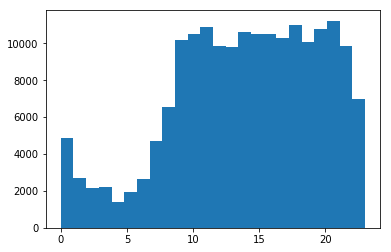

In [61]:
plt.hist(df_train["Time_hour"], bins=24)
plt.show()

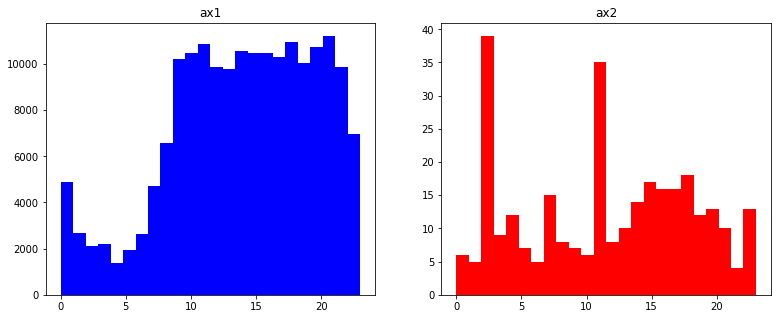

In [62]:
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1,2,1);ax1.set_title('ax1')
plt.hist(df_train[df_train["Class"]==0]["Time_hour"], bins = 24, color='b')
ax2 = fig.add_subplot(1,2,2);ax2.set_title('ax2')
plt.hist(df_train[df_train["Class"]==1]["Time_hour"], bins = 24, color='r')

plt.show()

# 시간으로 합치기 이전, 이후
## 그래프를 보면, 시간적인 특징이 있다고 볼 수 없다

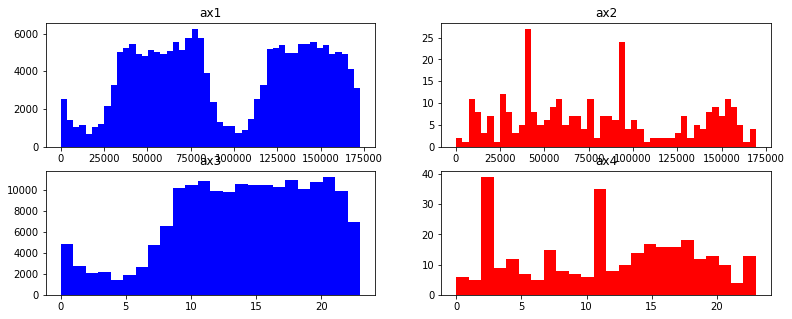

In [69]:
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(2,2,1);ax1.set_title('ax1')
plt.hist(df_train[df_train["Class"]==0]["Time"], bins = 48, color='b')
ax2 = fig.add_subplot(2,2,2);ax2.set_title('ax2')
plt.hist(df_train[df_train["Class"]==1]["Time"], bins = 48, color='r')

ax3 = fig.add_subplot(2,2,3);ax3.set_title('ax3')
plt.hist(df_train[df_train["Class"]==0]["Time_hour"], bins = 24, color='b')
ax4 = fig.add_subplot(2,2,4);ax4.set_title('ax4')
plt.hist(df_train[df_train["Class"]==1]["Time_hour"], bins = 24, color='r')

plt.show()

# Amount

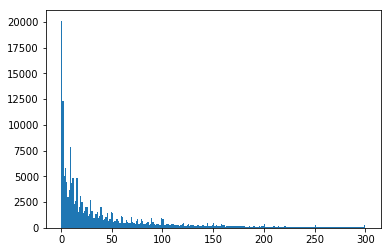

In [7]:
plt.hist(df_train["Amount"], bins=240, range=(0,300))
plt.show()

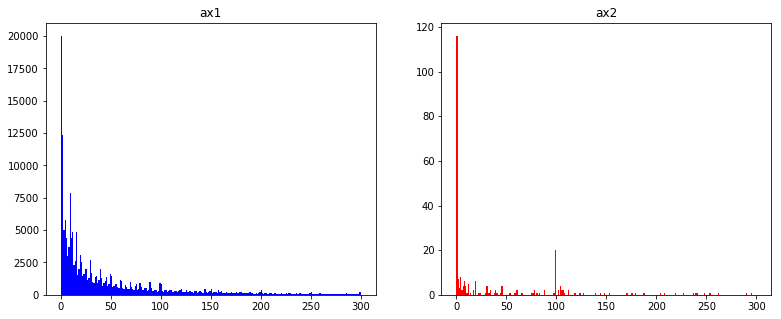

In [8]:
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(1,2,1);ax1.set_title('ax1')
plt.hist(df_train[df_train["Class"]==0]["Amount"], bins = 240, color='b', range=(0,300))
ax2 = fig.add_subplot(1,2,2);ax2.set_title('ax2')
plt.hist(df_train[df_train["Class"]==1]["Amount"], bins = 240, color='r', range=(0,300))
plt.show()

In [15]:
iris = sns.load_dataset("iris")
iris.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

In [16]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

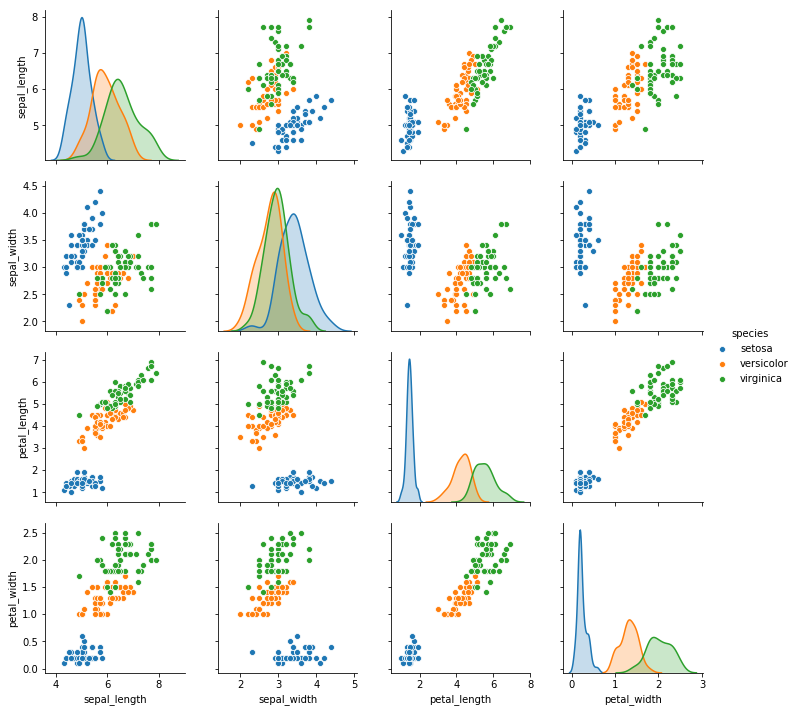

In [17]:
sns.pairplot(iris, hue="species")
plt.show()